In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os

# The code in this notebook should work identically between TF v1 and v2
import tensorflow as tf
import zipfile

from tensorflow.keras.applications import VGG16,ResNet50,InceptionV3
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
! ls

sample_data


In [0]:
! pwd

/content


In [3]:
! unzip data

Archive:  data.zip
   creating: test/
  inflating: test/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/test/
  inflating: __MACOSX/test/._.DS_Store  
   creating: test/alma/
  inflating: test/alma/lion001.jpg   
   creating: __MACOSX/test/alma/
  inflating: __MACOSX/test/alma/._lion001.jpg  
  inflating: test/alma/lion002.jpg   
  inflating: __MACOSX/test/alma/._lion002.jpg  
  inflating: test/alma/lion003.jpg   
  inflating: __MACOSX/test/alma/._lion003.jpg  
  inflating: test/alma/lion004.jpg   
  inflating: __MACOSX/test/alma/._lion004.jpg  
  inflating: test/alma/lion005.jpg   
  inflating: __MACOSX/test/alma/._lion005.jpg  
  inflating: test/alma/lion006.jpg   
  inflating: __MACOSX/test/alma/._lion006.jpg  
  inflating: test/alma/lion007.jpg   
  inflating: __MACOSX/test/alma/._lion007.jpg  
  inflating: test/alma/lion008.jpg   
  inflating: __MACOSX/test/alma/._lion008.jpg  
  inflating: test/alma/lion009.jpg   
  inflating: __MACOSX/test/alma/._lion009.jpg  
 

In [0]:
! ls

data.zip  __MACOSX  sample_data  test  train  val


In [0]:
! pwd

/content


In [4]:
! ls train

alma  curl  lion


In [0]:
#set data path
base_dir = '/content'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'val')
test_dir= os.path.join(base_dir, 'test')

train_alma_dir = os.path.join(train_dir, 'alma')
train_lion_dir = os.path.join(train_dir, 'lion')
train_curl_dir = os.path.join(train_dir, 'curl')

validation_alma_dir = os.path.join(validation_dir, 'alma')
validation_lion_dir = os.path.join(validation_dir, 'lion')
validation_curl_dir = os.path.join(validation_dir, 'curl')

test_alma_dir=os.path.join(test_dir, 'alma')
test_lion_dir=os.path.join(test_dir, 'lion')
test_curl_dir=os.path.join(test_dir, 'curl')


In [0]:
#explore data
num_alma_tr = len(os.listdir(train_alma_dir))
num_lion_tr = len(os.listdir(train_lion_dir))
num_curl_tr = len(os.listdir(train_curl_dir))

num_alma_val = len(os.listdir(validation_alma_dir))
num_lion_val = len(os.listdir(validation_lion_dir))
num_curl_val = len(os.listdir(validation_curl_dir))

num_alma_test = len(os.listdir(test_alma_dir))
num_lion_test = len(os.listdir(test_lion_dir))
num_curl_test = len(os.listdir(test_curl_dir))

total_train = num_alma_tr + num_lion_tr + num_curl_tr 
total_val = num_alma_val + num_lion_val + num_curl_val 
total_test = num_alma_test + num_lion_test + num_curl_test 

In [7]:
print('train set:',num_alma_tr ,num_lion_tr , num_curl_tr )
print('validation set:',num_alma_val , num_lion_val , num_curl_val )

print('total train set:', total_train)
print('total val set:', total_val)

train set: 282 269 276
validation set: 130 117 141
total train set: 827
total val set: 388


In [8]:
train_alma_dir

'/content/train/alma'

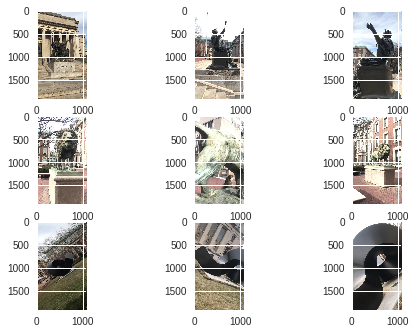

In [9]:
#show some images from dataset
plt.subplot(3,3,1)
img1=plt.imread(train_alma_dir+'/001.jpg')
plt.imshow(img1)
plt.subplot(3,3,2)
img2=plt.imread(train_alma_dir+'/079.jpg')
plt.imshow(img2)
plt.subplot(3,3,3)
img3=plt.imread(train_alma_dir+'/117.jpg')
plt.imshow(img3)

plt.subplot(3,3,4)
img4=plt.imread(train_lion_dir+'/087.jpg')
plt.imshow(img4)
plt.subplot(3,3,5)
img5=plt.imread(train_lion_dir+'/121.jpg')
plt.imshow(img5)
plt.subplot(3,3,6)
img6=plt.imread(train_lion_dir+'/179.jpg')
plt.imshow(img6)

plt.subplot(3,3,7)
img7=plt.imread(train_curl_dir+'/019.jpg')
plt.imshow(img7)
plt.subplot(3,3,8)
img8=plt.imread(train_curl_dir+'/124.jpg')
plt.imshow(img8)
plt.subplot(3,3,9)
img9=plt.imread(train_curl_dir+'/214.jpg')
plt.imshow(img9)

plt.show()

In [0]:
#data preprocessing:  read data, reshape, rescale

In [0]:
# Images will be resized to(TARGET_SHAPE, TARGET_SHAPE) as they're read off disk.
TARGET_SHAPE = 200 
BATCH_SIZE = 32

In [0]:
train_image_generator = ImageDataGenerator(rotation_range=45, 
                                           width_shift_range=.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True, 
                                           vertical_flip=True, 
                                           rescale=1./255,
                                          zoom_range=0.5,
                                          fill_mode='reflect')
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator=ImageDataGenerator(rescale=1./255)

In [13]:
#read images
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                     directory=train_dir, 
                                                     shuffle=True, # Best practice: shuffle the training data
                                                     target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                     class_mode='categorical')


Found 824 images belonging to 3 classes.


In [14]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                              directory=validation_dir, 
                                                              target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                              class_mode='categorical')                                                             

Found 387 images belonging to 3 classes.


In [15]:
test_data_gen=test_image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                              directory=test_dir, 
                                                              target_size=(TARGET_SHAPE, TARGET_SHAPE),
                                                              class_mode='categorical')

Found 392 images belonging to 3 classes.


In [0]:
#apply augmentation to a single image from dataset for 5 times
augmented_images=[train_data_gen[0][0][0] for i in range(5)]

In [0]:
#image examples
#next generates a batch of images
#sample_training_images, sample_training_labels = next(train_data_gen)

In [0]:
# This function will plot images in a grid with 1 row and 5 columns
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.grid(False)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

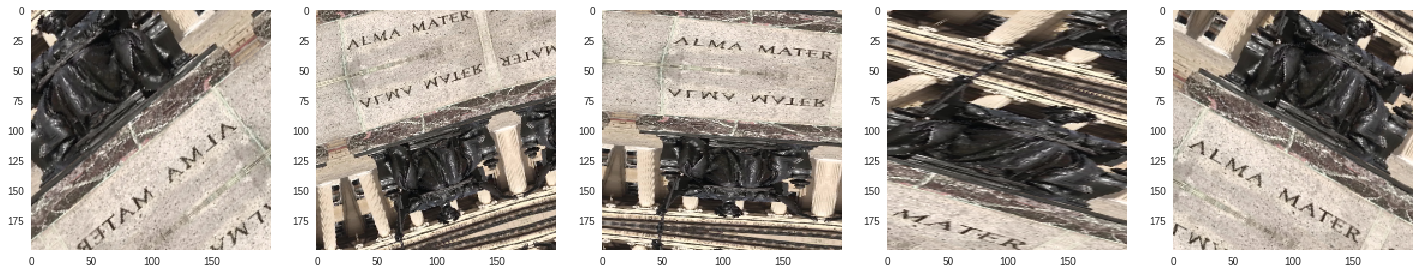

In [0]:
#show top 5 images
plotImages(augmented_images)

In [0]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(TARGET_SHAPE, TARGET_SHAPE, 3))

In [0]:
#define model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(512, activation=tf.keras.layers.LeakyReLU()))
model.add(Dense(256, activation=tf.keras.layers.LeakyReLU()))
#model.add(Dense(16, activation=tf.nn.leaky_relu))
model.add(Dense(3, activation='softmax'))

model.summary()
conv_base.trainable=False

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 771       
Total params: 24,284,483
Trainable params: 24,284,483
Non-trainable params: 0
_________________________________________________________________


In [0]:
#train the model using fit_generator

In [0]:
EPOCHS=20
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/20
26/26 [==============================] - 49s 2s/step - loss: 0.9052 - acc: 0.6068 - val_loss: 0.3259 - val_acc: 0.9354
Epoch 2/20
26/26 [==============================] - 41s 2s/step - loss: 0.3826 - acc: 0.8544 - val_loss: 0.1787 - val_acc: 0.9509
Epoch 3/20
26/26 [==============================] - 40s 2s/step - loss: 0.2550 - acc: 0.9017 - val_loss: 0.1982 - val_acc: 0.9328
Epoch 4/20
26/26 [==============================] - 41s 2s/step - loss: 0.2019 - acc: 0.9272 - val_loss: 0.1272 - val_acc: 0.9457
Epoch 5/20
26/26 [==============================] - 40s 2s/step - loss: 0.1871 - acc: 0.9296 - val_loss: 0.2620 - val_acc: 0.8708
Epoch 6/20
26/26 [==============================] - 42s 2s/step - loss: 0.1993 - acc: 0.9114 - val_loss: 0.1252 - val_acc: 0.9483
Epoch 7/20
26/26 [==============================] - 41s 2s/step - loss: 0.1496 - acc: 0.9430 - val_loss: 0.1143 - val_acc: 0.9638
Epoch 8/20
26/26 [==============================] - 40s 2s/step - loss: 0.1574 - acc: 0.94

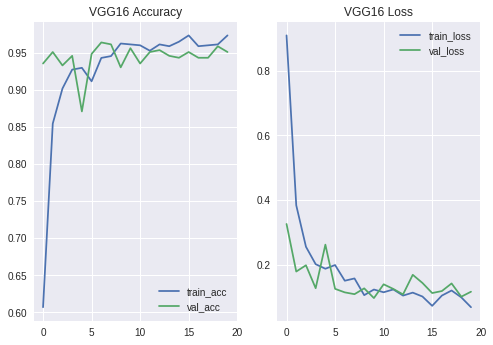

In [0]:
#plot acc
train_acc=history.history['acc']
val_acc=history.history['val_acc']
plt.subplot(1,2,1)
plt.plot(train_acc,label="train_acc")
plt.plot(val_acc,label="val_acc")
plt.legend()
plt.title('VGG16 Accuracy')

#plot loss
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.subplot(1,2,2)
plt.plot(train_loss,label="train_loss")
plt.plot(val_loss,label="val_loss")
plt.legend()
plt.title('VGG16 Loss')
plt.show()

In [0]:
test_loss,test_acc=model.evaluate_generator(test_data_gen)
print('Test loss: '+str(test_loss)+', Test acc: '+str(test_acc))

Test loss: 0.23866667741766343, Test acc: 0.9183673


In [0]:
#try smaller dense layer

In [0]:
#define model
model4 = Sequential()
model4.add(conv_base)
model4.add(Flatten())
#model.add(Dropout(0.5))
model4.add(Dense(32, activation=tf.keras.layers.LeakyReLU()))
model4.add(Dense(16, activation=tf.keras.layers.LeakyReLU()))
#model.add(Dense(16, activation=tf.nn.leaky_relu))
model4.add(Dense(3, activation='softmax'))

model4.summary()
conv_base.trainable=False

model4.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                589856    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 51        
Total params: 15,305,123
Trainable params: 590,435
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
EPOCHS=20
history = model4.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/20
26/26 [==============================] - 50s 2s/step - loss: 0.9731 - acc: 0.5692 - val_loss: 0.7081 - val_acc: 0.8553
Epoch 2/20
26/26 [==============================] - 43s 2s/step - loss: 0.6064 - acc: 0.8046 - val_loss: 0.3706 - val_acc: 0.9432
Epoch 3/20
26/26 [==============================] - 40s 2s/step - loss: 0.4011 - acc: 0.8689 - val_loss: 0.2140 - val_acc: 0.9716
Epoch 4/20
26/26 [==============================] - 40s 2s/step - loss: 0.3027 - acc: 0.8956 - val_loss: 0.1985 - val_acc: 0.9302
Epoch 5/20
26/26 [==============================] - 40s 2s/step - loss: 0.2721 - acc: 0.9090 - val_loss: 0.1375 - val_acc: 0.9612
Epoch 6/20
26/26 [==============================] - 40s 2s/step - loss: 0.1997 - acc: 0.9381 - val_loss: 0.1431 - val_acc: 0.9587
Epoch 7/20
26/26 [==============================] - 40s 2s/step - loss: 0.2275 - acc: 0.9235 - val_loss: 0.1729 - val_acc: 0.9535
Epoch 8/20
26/26 [==============================] - 40s 2s/step - loss: 0.1934 - acc: 0.92

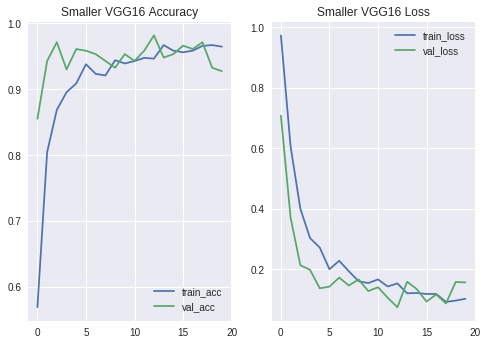

In [0]:
#plot acc
train_acc=history.history['acc']
val_acc=history.history['val_acc']
plt.subplot(1,2,1)
plt.plot(train_acc,label="train_acc")
plt.plot(val_acc,label="val_acc")
plt.legend()
plt.title('Smaller VGG16 Accuracy')

#plot loss
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.subplot(1,2,2)
plt.plot(train_loss,label="train_loss")
plt.plot(val_loss,label="val_loss")
plt.legend()
plt.title('Smaller VGG16 Loss')
plt.show()

In [0]:
test_loss,test_acc=model.evaluate_generator(test_data_gen)
print('Smaller VGG Test loss: '+str(test_loss)+', Test acc: '+str(test_acc))

Smaller VGG Test loss: 0.2391729958068866, Test acc: 0.9183673


In [42]:
#define my model
model3 = Sequential()

model3.add(Conv2D(32,(3,3),activation='relu',input_shape=(TARGET_SHAPE, TARGET_SHAPE, 3)))
model3.add(MaxPooling2D((2,2)))
model3.add(Conv2D(32,(3,3),activation='relu'))
model3.add(MaxPooling2D((2,2)))
model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(MaxPooling2D((2,2)))
model3.add(Conv2D(128,(3,3),activation='relu'))
#model3.add(MaxPooling2D((2,2)))

model3.add(Flatten())
#model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(32, activation='relu'))
#activation=tf.keras.layers.LeakyReLU()
model3.add(Dense(3, activation='softmax'))
model3.build()
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 21, 21, 128)       73856     
__________

In [0]:
model3.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [44]:
EPOCHS=25
history = model3.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/25
26/26 [==============================] - 42s 2s/step - loss: 1.0674 - acc: 0.3883 - val_loss: 1.0851 - val_acc: 0.4238
Epoch 2/25
26/26 [==============================] - 35s 1s/step - loss: 0.9461 - acc: 0.5146 - val_loss: 1.0239 - val_acc: 0.4832
Epoch 3/25
26/26 [==============================] - 34s 1s/step - loss: 0.7539 - acc: 0.5886 - val_loss: 0.6633 - val_acc: 0.6486
Epoch 4/25
26/26 [==============================] - 34s 1s/step - loss: 0.6983 - acc: 0.6104 - val_loss: 0.6784 - val_acc: 0.6227
Epoch 5/25
26/26 [==============================] - 34s 1s/step - loss: 0.7034 - acc: 0.6214 - val_loss: 0.6923 - val_acc: 0.6667
Epoch 6/25
26/26 [==============================] - 34s 1s/step - loss: 0.7001 - acc: 0.6432 - val_loss: 0.8383 - val_acc: 0.6072
Epoch 7/25
26/26 [==============================] - 34s 1s/step - loss: 0.5755 - acc: 0.6905 - val_loss: 0.5525 - val_acc: 0.7003
Epoch 8/25
26/26 [==============================] - 34s 1s/step - loss: 0.5525 - acc: 0.69

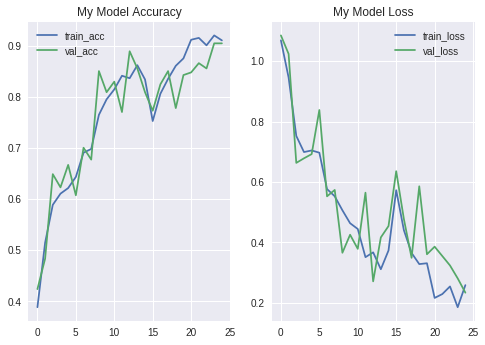

In [45]:
#plot acc
train_acc=history.history['acc']
val_acc=history.history['val_acc']
plt.subplot(1,2,1)
plt.plot(train_acc,label="train_acc")
plt.plot(val_acc,label="val_acc")
plt.legend()
plt.title('My Model Accuracy')

#plot loss
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.subplot(1,2,2)
plt.plot(train_loss,label="train_loss")
plt.plot(val_loss,label="val_loss")
plt.legend()
plt.title('My Model Loss')
plt.show()

In [46]:
test_loss,test_acc=model3.evaluate_generator(test_data_gen)
print('Smaller VGG Test loss: '+str(test_loss)+', Test acc: '+str(test_acc))

Smaller VGG Test loss: 0.33064094816262907, Test acc: 0.872449


For pre-trained models: VGG16

With two different set of dense layers: the first with size 256, 128 and the second with size 32, 16, the curve and the test accuracy are unbelievably same: both networks have the test accuracy of 91.83%. It in a way proves the finding that VGG's large dense layers do not really matter. With a lot smaller dense layer, the performace might be the same, while the computation cost reduces significantly.

For the model implemented my self, it uses 1,910,019 trainable variables and achieved about 87% accuracy. The size of trainable variables is only 7% and 14% of the above models using VGG16